In [34]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"


# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load, encoding="UTF-8")
clinical_data_df = pd.read_csv(clinical_trial_data_to_load, encoding="UTF-8")

# Combine the data into a single dataset
clinical_mouse_df = clinical_data_df.merge(mouse_drug_df, on="Mouse ID")


# Display the data table for preview
clinical_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_means = clinical_mouse_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
tumor_volume_means_df = tumor_volume_means.to_frame()

# Preview DataFrame
tumor_volume_means_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem = clinical_mouse_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
tumor_volume_sem_df = tumor_volume_sem.to_frame()

# Preview DataFrame
tumor_volume_sem_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [43]:
# Minor Data Munging to Re-Format the Data Frames
mydrugs_tumor_mean_df = clinical_mouse_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean().unstack(level=0)

# Preview that Reformatting worked
mydrugs_tumor_mean_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


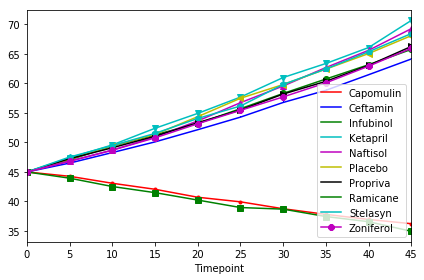

In [28]:
# Generate the Plot (with Error Bars)
# gca stands for 'get current axis'
ax = plt.gca()
markers = ['.',',','o','v','^','<','>','s','p','8']
colors = ['r','b','g','c','m','y','k','g','c','m']

for i in range(len(mydrugs_tumor_mean_df.columns)):
    mydrugs_tumor_mean_df.plot(kind='line',y=mydrugs_tumor_mean_df.columns[i],ax=ax,color = colors[i], marker = markers[i])
plt.tight_layout()
plt.show()
# Save the Figure



## Metastatic Response to Treatment

In [29]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean = clinical_mouse_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
meta_mean_df = meta_mean.to_frame()

# Preview DataFrame
meta_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [30]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_sem = clinical_mouse_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
meta_sem_df = meta_sem.to_frame()

# Preview DataFrame
meta_sem_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [31]:
# Minor Data Munging to Re-Format the Data Frames
mydrugs_meta_mean_df = clinical_mouse_df.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean().unstack(level=0)

# Preview that Reformatting worked
mydrugs_meta_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


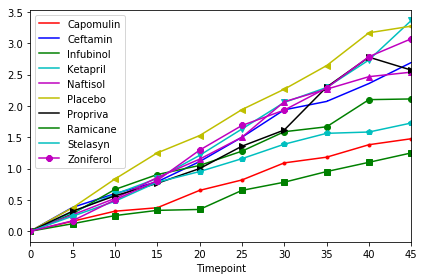

In [32]:
# Generate the Plot (with Error Bars)
# gca stands for 'get current axis'
ax = plt.gca()
markers = ['.',',','o','v','^','<','>','s','p','8']
colors = ['r','b','g','c','m','y','k','g','c','m']

for i in range(len(mydrugs_df.columns)):
    mydrugs_meta_mean_df.plot(kind='line',y=mydrugs_meta_mean_df.columns[i],ax=ax,color = colors[i], marker = markers[i])
plt.tight_layout()
plt.show()
# Save the Figure



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [40]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = clinical_mouse_df.groupby(["Drug","Timepoint"])["Mouse ID"].nunique()

# Convert to DataFrame
mouse_count_df = mouse_count.to_frame()

# Preview DataFrame
mouse_count_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [41]:
# Minor Data Munging to Re-Format the Data Frames
mouse_count_unique_df = clinical_mouse_df.groupby(["Drug","Timepoint"])["Mouse ID"].nunique().unstack(level=0)

# Preview the Data Frame
mouse_count_unique_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


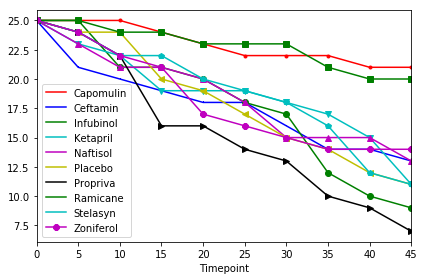

In [42]:
# Generate the Plot (Accounting for percentages)
# Generate the Plot (with Error Bars)
# gca stands for 'get current axis'
ax = plt.gca()
markers = ['.',',','o','v','^','<','>','s','p','8']
colors = ['r','b','g','c','m','y','k','g','c','m']

for i in range(len(mydrugs_df.columns)):
    mouse_count_unique_df.plot(kind='line',y=mouse_count_unique_df.columns[i],ax=ax,color = colors[i], marker = markers[i])
plt.tight_layout()
plt.show()
# Save the Figure


# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [138]:
# Calculate the percent changes for each drug
mystarts = []
myends = []
for i in range(10):
    mystarts.append(clinical_mouse_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()[[i*10]][0])
    myends.append(clinical_mouse_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()[[9 + (i*10)]][0])
mystarts
myends

mydiff = []
for i in range(len(mystarts)):
    mydiff.append(((myends[i]-mystarts[i])/(mystarts[i]))*100)
mydiff

mydiffs_df = pd.DataFrame({"Drug":mydrugs_tumor_mean_df.columns,"":mydiff})
mydiffs_df = mydiffs_df.set_index(["Drug"]).squeeze()
mydiffs_df

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: , dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)